# Nifti objects data type

Another option for plotting and importing/exporting data is using the Nifti objects. Nifti objects are a subclass of the neuroimaging format Nibabel Nifti1Image, which is a file that generally has the extension “.nii” or “.nii.gz”. This allows the user to use our methods with the Nifti class but also use other functionality such as Nibabel and Nilearn methods.

# Load in the required libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
import supereeg as se
%load_ext autoreload
%autoreload 2

First, let’s load in an example nifti file, example_nifti:

In [3]:
path = '../miller_data/faces_basic/brains/aa/aa_mri.nii'
nii = se.load(path)

In [3]:
nii = se.load('example_nifti')

sizeof_hdr should be 348; set sizeof_hdr to 348
data code 26996 not recognized; not attempting fix
sizeof_hdr should be 348; set sizeof_hdr to 348
data code 26996 not recognized; not attempting fix


HeaderDataError: data code 26996 not recognized

# Initialize nifti objects

Nifti objects can be initialized by passing any of the following to the Nifti class instance initialization function: - A path to a nifti file (ending in .nii or .nii.gz) - An existing Nifti object (this makes a copy of the object) - A path to any other toolbox-supported datatype, or an instance of another supported datatype (Brain or Model objects)

You may also initialize a Nifti object using the load function by specifying return_type='nii'.

For example:

In [8]:
bo_nii = se.Nifti('example_data')

[ 91 109  91]


MemoryError: Unable to allocate 33.6 GiB for an array with shape (91, 109, 91, 5000) and data type float64

Or:

In [4]:
bo_nii = se.load('example_data', return_type='nii')

MemoryError: Unable to allocate 33.6 GiB for an array with shape (91, 109, 91, 5000) and data type float64

# Spatial resampling

Any Nifti object may be quickly resampled to an arbitrary voxel size using the vox_size argument. The voxel sizes may be specified either as a scalar (for cubic voxels) or as a 3D tuple (for rectangular prism or parallelopiped voxels):

In [4]:
bo_nii = se.Nifti('example_data', vox_size=6)

# Nifti object methods

Some useful methods on a nifti object:

## nifti.info()

This method will give you a summary of the nifti object:

In [10]:
nii.info()

Header: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 124   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.       1.01562  1.01562  1.5      1.       1.       1.       1.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.049674988
quatern_c       : 0.99760854
quatern_d       : -0.025187185
qoffset_x       : 128.36337
qoffset_y      

## nifti.get_slice()

This method allows you to slice out images from your nifti object, and returns the indexed nifti.

In [6]:
nii_sliced = bo_nii.get_slice(index=[0,1,2])

## nifti.plot_glass_brain()

This method will plot your nifti object.

This method wraps nilearn.plot_glass_brain to plot the nifti object, so any arguments that nilearn.plot_glass_brain accepts are supported by nifti.plot_glass_brain.

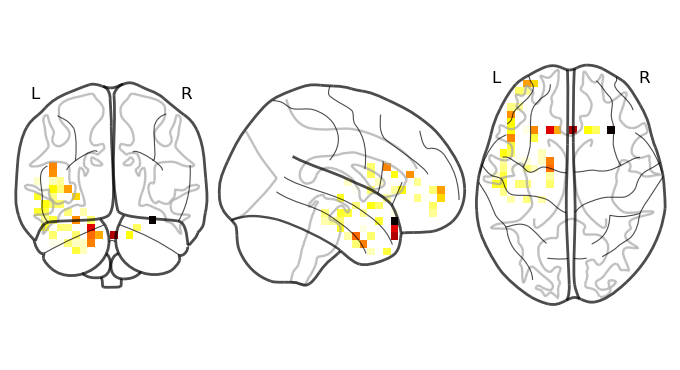

In [7]:
nii_sliced.plot_glass_brain()

## nifti.plot_anat()

This method will plot your nifti object.

This method wraps nilearn.plot_anat to plot the nifti object, so any arguments that nilearn.plot_anat accepts are supported by nifti.anat. For example, you can plot the example nifti:

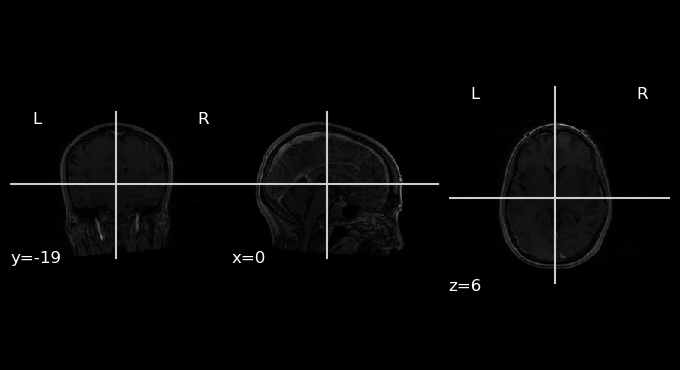

In [8]:
nii.plot_anat()

## nifti.make_gif()

This method will plot 4D nifti data as nilearn.plot_glass_brain, save as png files, and compile the files as gif.

This method wraps nilearn.plot_glass_brain to plot the nifti object, so any arguments that nilearn.plot_glass_brain accepts are supported by nifti.plot_glass_brain.

In [10]:
#nii.make_gif(gifpath='/path/to/save/gif', index=range(0, 10), name=None, **kwargs)

## nifti.save()

This method will save your nifti object to the specified filepath location as a ‘nii’ file.

In [11]:
#nii.save(filepath='/path/to/save/nifti')